
##This is a notebook showing basics of tensorflow and implementing a small neural network and Simple Regression Model


In [30]:
print(tf.__version__)

2.3.0


In [32]:
tf.executing_eagerly()

True

As version of this tensorflow is as 2.3.0 and I am working on v1; hene disabling other behaviours
# IF you don't disable other versions you might face serious errors and issues 

In [45]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


#Some basic pre-processing and data collection

In [34]:
a = tf.constant([[1,2], [3, 4]])

In [37]:
np.random.seed(101)

In [36]:
import numpy as np

In [42]:
rand_a = np.random.uniform(0,100,[5,5])

In [43]:
rand_b = np.random.uniform(0,100,[5,1])

In [46]:
a = tf.placeholder(tf.float32)

In [48]:
b = tf.placeholder(tf.float32)

In [49]:
add_op = a+b
mul_op = a*b

In [51]:
with tf.Session() as sess:
  add_result = sess.run(add_op, feed_dict={a:10,b:20})
  print(add_result)

  multiply_result = sess.run(mul_op, feed_dict={a:10,b:5})
  print(multiply_result)



30.0
50.0


#Neural Networks

In [1]:
n_features = 10

In [54]:
n_dense_neurons = 3

In [55]:
x= tf.placeholder(tf.float32, shape=(None,n_features))

In [56]:
w = tf.Variable(tf.random_normal([n_features,n_dense_neurons]))

In [57]:
b = tf.Variable (tf.ones([n_dense_neurons]))

In [58]:
xw = tf.matmul(x,w)

In [59]:
z = tf.add(xw, b)

In [60]:
a = tf.sigmoid(z)

In [61]:
init = tf.global_variables_initializer()

In [63]:
with tf.Session() as sess:
  sess.run(init)
  layer_out = sess.run(a, feed_dict={x:np.random.random([1,n_features])})
  print(layer_out)

[[0.63450253 0.97408205 0.5817766 ]]


# Simple regression example

In [67]:
import matplotlib.pyplot as plt

In [69]:
x_data  = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

In [71]:
y_label = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

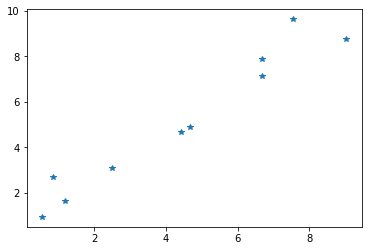

In [73]:
plt.plot(x_data,y_label,'*')

# equaltion of line is " Y= MX+ C"

# CONSIDERING 2 RANDOM POINTS 

In [76]:
np.random.rand(2)

array([0.78452185, 0.68724204])

In [77]:
m = tf.Variable(0.78)

In [78]:
b = tf.Variable(0.68)

In [79]:
# COMPUTING COST FUNCTION

In [80]:
#Define error rate
error= 0
for x,y in zip(x_data,y_label):
  y_hat = m*x + b

# here, y_hat is predicted value of y; after training on data
  error += (y-y_hat)**2

# Optimizing function

 here, we are using Gradient Descent !

In [83]:
optimizer  = tf.train.GradientDescentOptimizer(learning_rate=0.001)

Here as we are computing error rate; it need to be minimized.

In [84]:
train = optimizer.minimize(error)

In [87]:
init = tf.global_variables_initializer()

In [88]:
with tf.Session() as sess:
  sess.run(init)
  #Keeping no of training steps as 1, initially;
  training_steps = 1
  for i in range(training_steps):
    sess.run(train)
  final_slope, final_intercept = sess.run([m,b])


In [89]:
X_test = np.linspace(-1,11,10)

In [90]:
y_pred_plot = final_slope*X_test + final_intercept

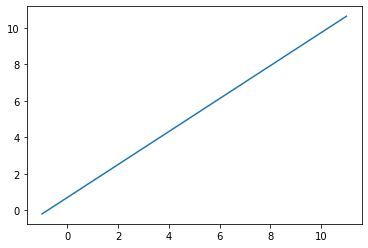

In [91]:
plt.plot(X_test, y_pred_plot)

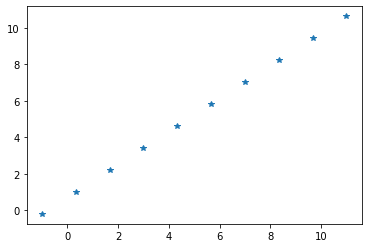

In [92]:
plt.plot(X_test, y_pred_plot,'*')

# Speaking of which, after looking into the plot of test data versus the predicted values; it is a straight line.
 # Hence, our model is sucessfully deployed with minimalist rate